In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 300)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import sys
sys.path.append(os.path.abspath('../'))

import warnings
warnings.filterwarnings("ignore")

from server2022.src.train_val import *
from server2022.src.model_features import *
from server2022.data.processed.prepare_data import *


OUTPUT_FILE = '../reports/report_1_30_days.csv'

TARGET_DICT = {'1': 'binary_target', '2': 'target_more30days', '3': 'target_more90days'}
'''Choose target: 
    1 - binary_target
    2 - target_more30days
    3 - target_more90days
'''
TARGET_COL = TARGET_DICT['2'] # TARGET_DICT[input()]

### All features

In [2]:
df = create_df_1year_known(normalize_fin_columns=False)

In [3]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df)

In [4]:
df.head(3)

,Наименование ДП,Итого,"-2, Основные средства , RUB","-1, Основные средства , RUB","-2, Внеоборотные активы, RUB","-1, Внеоборотные активы, RUB","-2, Дебиторская задолженность, RUB","-1, Дебиторская задолженность, RUB","-2, Оборотные активы, RUB","-1, Оборотные активы, RUB","-2, Капитал и резервы, RUB","-1, Капитал и резервы, RUB","-2, Кредиторская задолженность, RUB","-1, Кредиторская задолженность, RUB","-1, Краткосрочные обязательства, RUB","-2, Выручка, RUB","-1, Выручка, RUB","-2, Себестоимость продаж, RUB","-1, Себестоимость продаж, RUB","-2, Прибыль (убыток) до налогообложения , RUB","-1, Прибыль (убыток) до налогообложения , RUB","-2, Прибыль (убыток) от продажи, RUB","-1, Прибыль (убыток) от продажи, RUB",year,binary_target,target_more30days,target_more90days,"Макс. ПДЗ за -1 год, дней","Сред. ПДЗ за -1 год, дней","Кол-во просрочек свыше 5-ти дней за -1 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за -1 год, руб.","Кол-во раз ПДЗ за -1 год, шт.","-3, Основные средства , RUB","-3, Внеоборотные активы, RUB","-3, Дебиторская задолженность, RUB","-3, Оборотные активы, RUB","-3, Капитал и резервы, RUB","-3, Кредиторская задолженность, RUB","-2, Краткосрочные обязательства, RUB","-3, Выручка, RUB","-3, Себестоимость продаж, RUB","-3, Прибыль (убыток) до налогообложения , RUB","-3, Прибыль (убыток) от продажи, RUB",Основные средства total mean growth,Внеоборотные активы total mean growth,Дебиторская задолженность total mean growth,Оборотные активы total mean growth,Капитал и резервы total mean growth,Кредиторская задолженность total mean growth,Краткосрочные обязательства total mean growth,Выручка total mean growth,Себестоимость продаж total mean growth,Прибыль (убыток) до налогообложения total mean growth,Прибыль (убыток) от продажи total mean growth,"log -3, Основные средства , RUB","log -2, Основные средства , RUB","log -1, Основные средства , RUB","log -3, Внеоборотные активы, RUB","log -2, Внеоборотные активы, RUB","log -1, Внеоборотные активы, RUB","log -3, Дебиторская задолженность, RUB","log -2, Дебиторская задолженность, RUB","log -1, Дебиторская задолженность, RUB","log -3, Оборотные активы, RUB","log -2, Оборотные активы, RUB","log -1, Оборотные активы, RUB","log -3, Капитал и резервы, RUB","log -2, Капитал и резервы, RUB","log -1, Капитал и резервы, RUB","log -3, Кредиторская задолженность, RUB","log -2, Кредиторская задолженность, RUB","log -1, Кредиторская задолженность, RUB","log -2, Краткосрочные обязательства, RUB","log -1, Краткосрочные обязательства, RUB","log -3, Выручка, RUB","log -2, Выручка, RUB","log -1, Выручка, RUB","log -3, Себестоимость продаж, RUB","log -2, Себестоимость продаж, RUB","log -1, Себестоимость продаж, RUB","log -3, Прибыль (убыток) до налогообложения , RUB","log -2, Прибыль (убыток) до налогообложения , RUB","log -1, Прибыль (убыток) до налогообложения , RUB","log -3, Прибыль (убыток) от продажи, RUB","log -2, Прибыль (убыток) от продажи, RUB","log -1, Прибыль (убыток) от продажи, RUB","Основные средства _,прирост_за_-1_год","Внеоборотные активы_,прирост_за_-1_год","Дебиторская задолженность_,прирост_за_-1_год","Оборотные активы_,прирост_за_-1_год","Капитал и резервы_,прирост_за_-1_год","Кредиторская задолженность_,прирост_за_-1_год","Краткосрочные обязательства_,прирост_за_-1_год","Выручка_,прирост_за_-1_год","Себестоимость продаж_,прирост_за_-1_год","Прибыль (убыток) до налогообложения _,прирост_за_-1_год","Прибыль (убыток) от продажи_,прирост_за_-1_год","Основные средства , относительный прирост за -1 год","Внеоборотные активы, относительный прирост за -1 год","Дебиторская задолженность, относительный прирост за -1 год","Оборотные активы, относительный прирост за -1 год","Капитал и резервы, относительный прирост за -1 год","Кредиторская задолженность, относительный прирост за -1 год","Краткосрочные обязательства, относительный прирост за -1 год","Выручка, относительный прирост за -1 год","Себестоимость продаж, относительный прирост за -1 год","Прибыль (убыток) до налогообложения , о

In [5]:
# for 30_days {'depth': 4.0, 'l2_leaf_reg': 8.836237522928192, 'learning_rate': 0.019172380484543887}

model = CatBoostClassifier(iterations=500,
                               depth=4, 
                               l2_leaf_reg=8.8, 
                               learning_rate=0.0192, # 0.01433
                               loss_function='Logloss',
                               use_best_model=False,
                               eval_metric='AUC',
                               verbose=False,
                               class_weights=[1, 0.1], #0.0006
                               random_seed=RANDOM_STATE,
                              )

Target = target_more30days
Fitting model <catboost.core.CatBoostClassifier object at 0x000001A3BF51D9D0> with threshold = 0.01498...


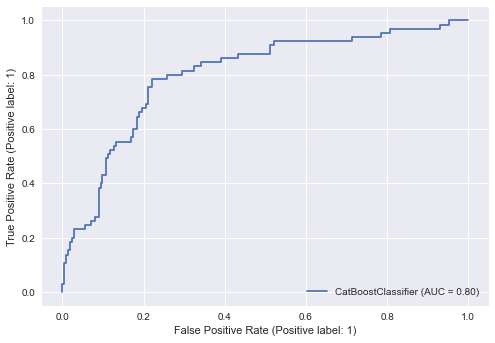

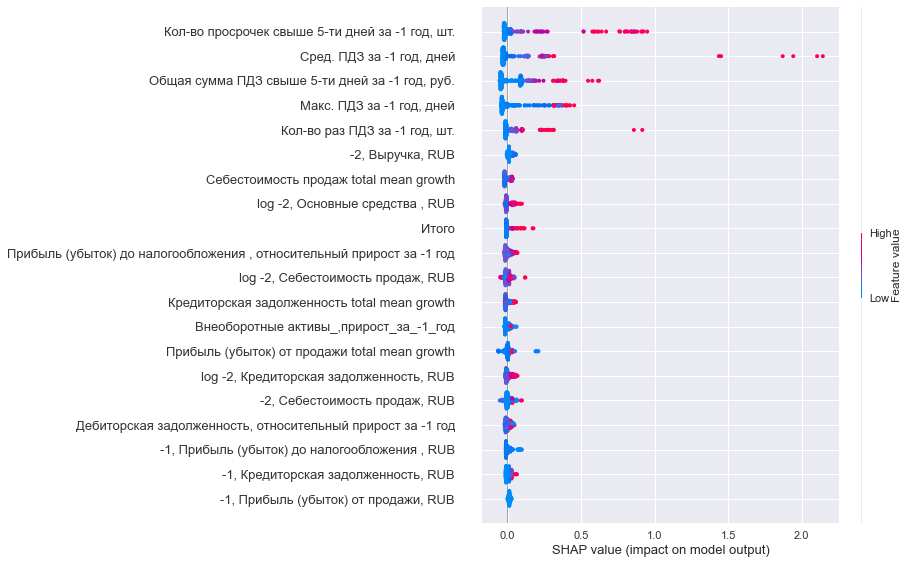


TRAIN: F1 = 0.409, Precision = 0.286, Recall = 0.72, Accuracy = 0.666, ROC_AUC = 0.783
TEST: F1 = 0.546, Precision = 0.4, Recall = 0.862, Accuracy = 0.665, ROC_AUC = 0.801



In [6]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=10,
                                file_path=OUTPUT_FILE, comment='normalize_fin_columns=False')

## All features, drop_zeros=False

In [7]:
df = create_df_1year_known(normalize_fin_columns=False, drop_zeros=False)

In [8]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df)

Target = target_more30days
Fitting model <catboost.core.CatBoostClassifier object at 0x000001A3BF51D9D0> with threshold = 0.0152...


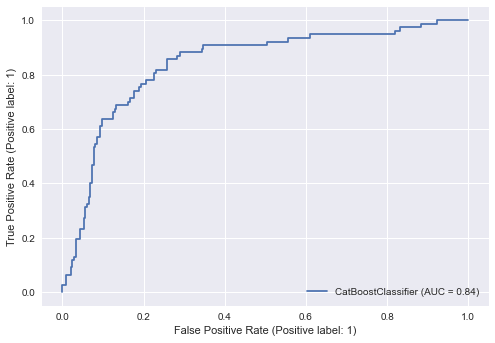

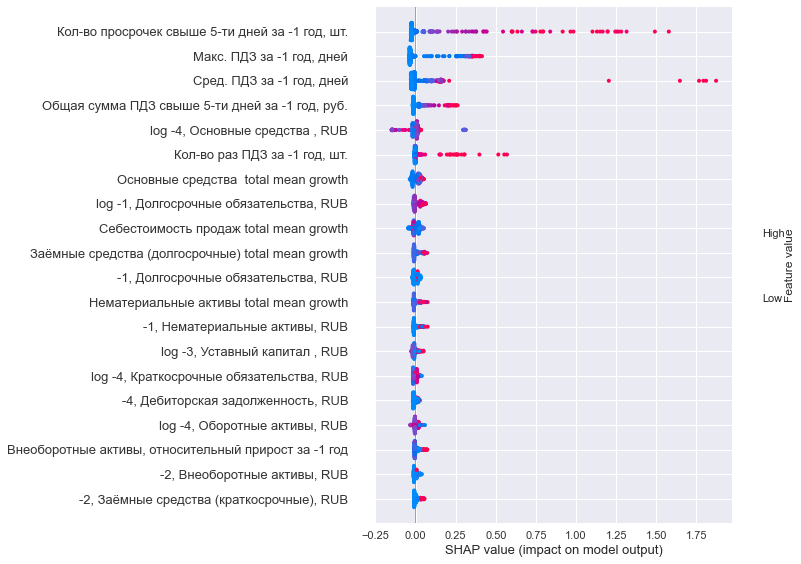


TRAIN: F1 = 0.425, Precision = 0.299, Recall = 0.735, Accuracy = 0.689, ROC_AUC = 0.814
TEST: F1 = 0.599, Precision = 0.453, Recall = 0.883, Accuracy = 0.72, ROC_AUC = 0.84



In [9]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=10,
                                file_path=OUTPUT_FILE, comment='All features, drop_zeros=False')

## No features

In [10]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=False, drop_zeros=False)

In [11]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)

Target = target_more30days
Fitting model <catboost.core.CatBoostClassifier object at 0x000001A3BF51D9D0> with threshold = 0.01459...


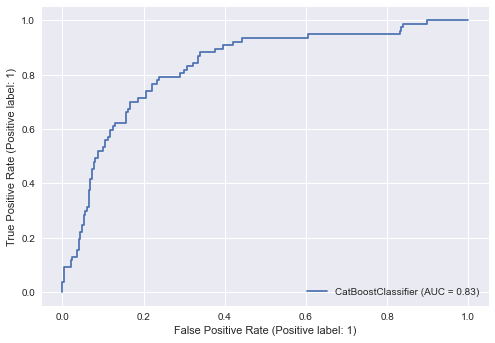

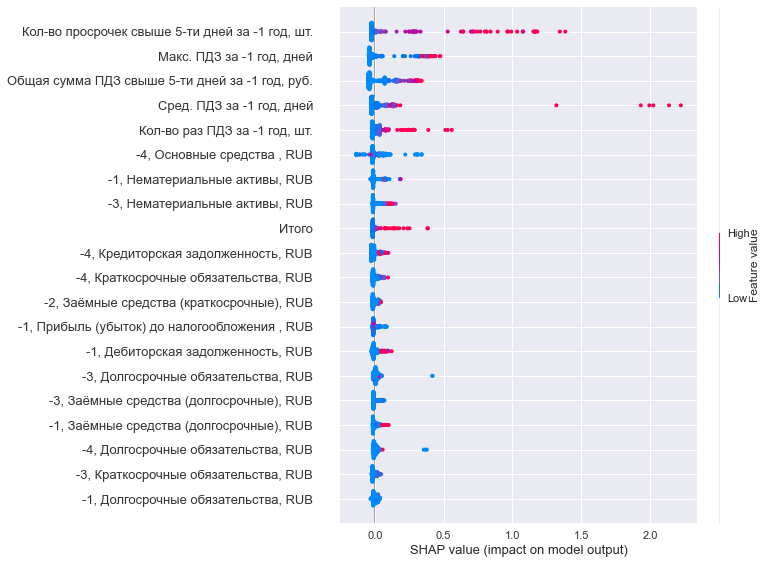


TRAIN: F1 = 0.406, Precision = 0.29, Recall = 0.675, Accuracy = 0.691, ROC_AUC = 0.782
TEST: F1 = 0.581, Precision = 0.433, Recall = 0.883, Accuracy = 0.698, ROC_AUC = 0.829



In [12]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=10,
                                file_path=OUTPUT_FILE, comment='no_features')

## drop_zeros=True

In [13]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=False, drop_zeros=True)

In [14]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)

Target = target_more30days
Fitting model <catboost.core.CatBoostClassifier object at 0x000001A3BF51D9D0> with threshold = 0.0143...


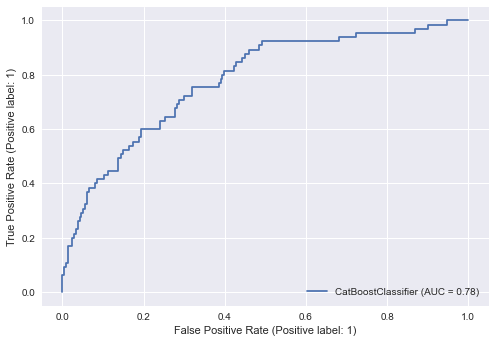

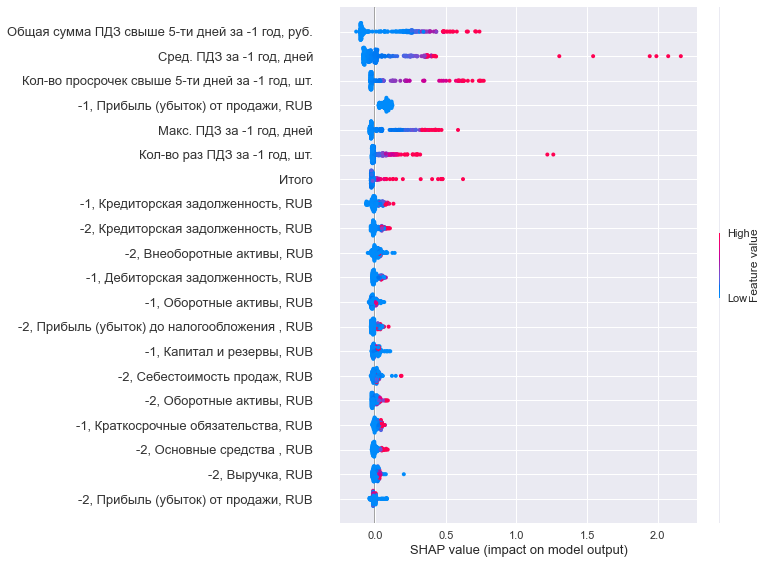


TRAIN: F1 = 0.39, Precision = 0.271, Recall = 0.693, Accuracy = 0.651, ROC_AUC = 0.76
TEST: F1 = 0.52, Precision = 0.364, Recall = 0.908, Accuracy = 0.608, ROC_AUC = 0.779



In [15]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=10,
                                file_path=OUTPUT_FILE, comment='drop_zeros=True')

## use_diff_features=True

In [16]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=False, drop_zeros=False)

In [17]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=True, use_ratio_features=False)

Target = target_more30days
Fitting model <catboost.core.CatBoostClassifier object at 0x000001A3BF51D9D0> with threshold = 0.01446...


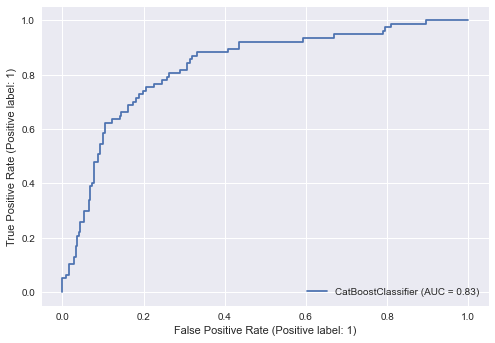

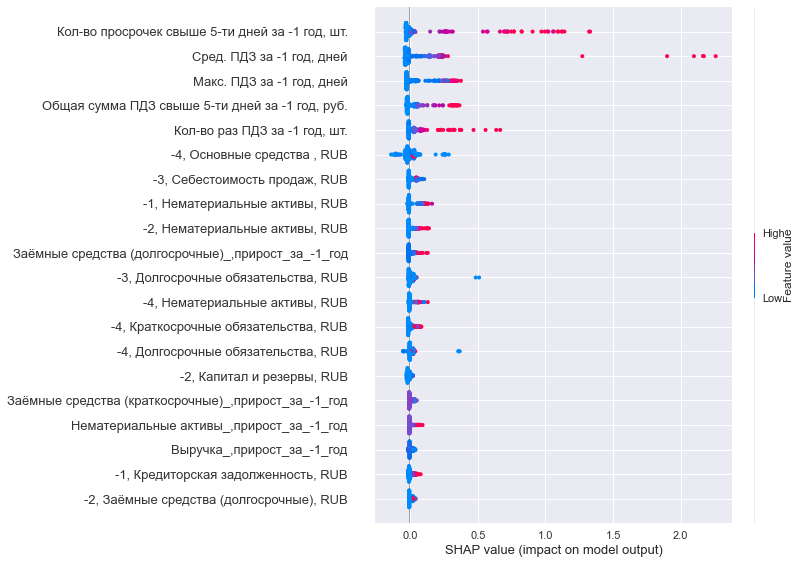


TRAIN: F1 = 0.396, Precision = 0.28, Recall = 0.675, Accuracy = 0.678, ROC_AUC = 0.781
TEST: F1 = 0.574, Precision = 0.425, Recall = 0.883, Accuracy = 0.689, ROC_AUC = 0.83



In [18]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=10,
                                file_path=OUTPUT_FILE, comment='use_diff_features=True')

## use_ratio_features=True

In [19]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=False, drop_zeros=False)

In [20]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=True)

Target = target_more30days
Fitting model <catboost.core.CatBoostClassifier object at 0x000001A3BF51D9D0> with threshold = 0.01523...


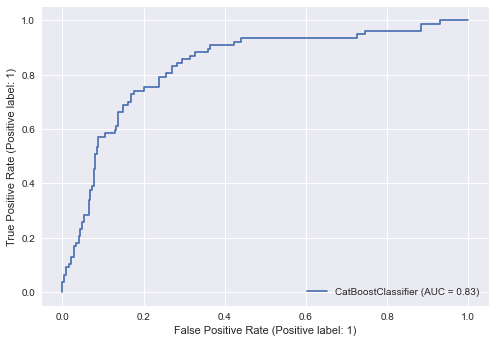

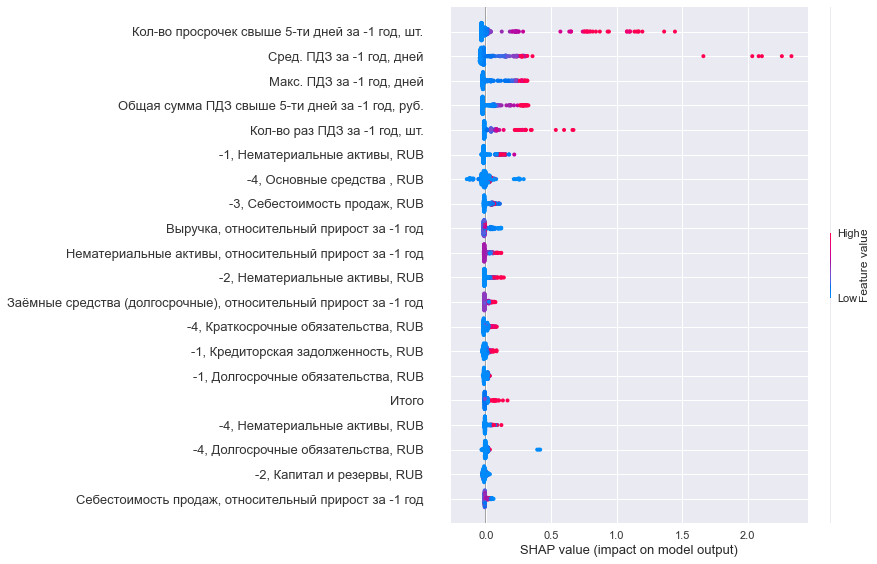


TRAIN: F1 = 0.409, Precision = 0.296, Recall = 0.663, Accuracy = 0.701, ROC_AUC = 0.795
TEST: F1 = 0.594, Precision = 0.447, Recall = 0.883, Accuracy = 0.714, ROC_AUC = 0.834



In [21]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=10,
                                file_path=OUTPUT_FILE, comment='use_ratio_features=True')

## add_growth=True

In [22]:
df = create_df_1year_known(add_growth=True, count_log_fin_vals=False, normalize_fin_columns=False, drop_zeros=False)

In [23]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)

Target = target_more30days
Fitting model <catboost.core.CatBoostClassifier object at 0x000001A3BF51D9D0> with threshold = 0.01553...


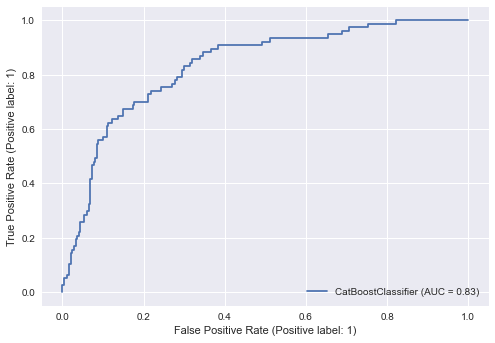

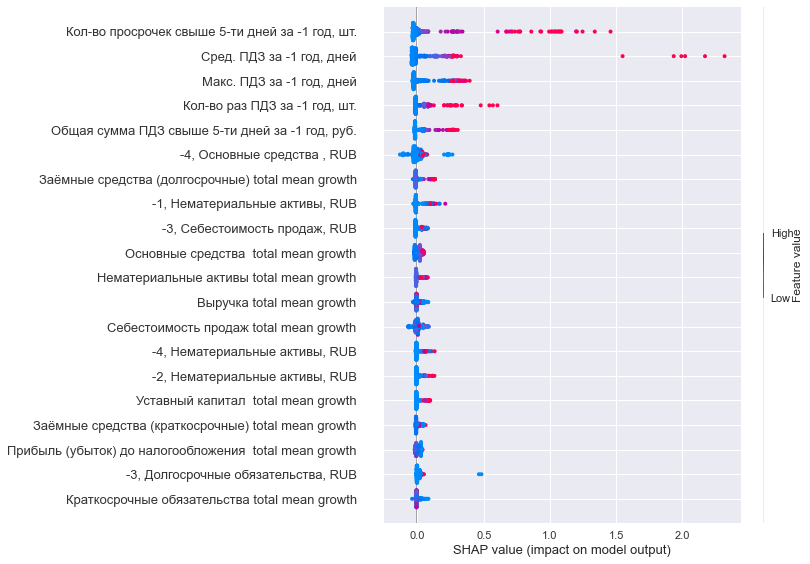


TRAIN: F1 = 0.432, Precision = 0.318, Recall = 0.675, Accuracy = 0.723, ROC_AUC = 0.812
TEST: F1 = 0.584, Precision = 0.443, Recall = 0.857, Accuracy = 0.711, ROC_AUC = 0.833



In [24]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=10,
                                file_path=OUTPUT_FILE, comment='add_growth=True')

## count_log_fin_vals=True

In [25]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=True, normalize_fin_columns=False, drop_zeros=False)

In [26]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)

Target = target_more30days
Fitting model <catboost.core.CatBoostClassifier object at 0x000001A3BF51D9D0> with threshold = 0.01526...


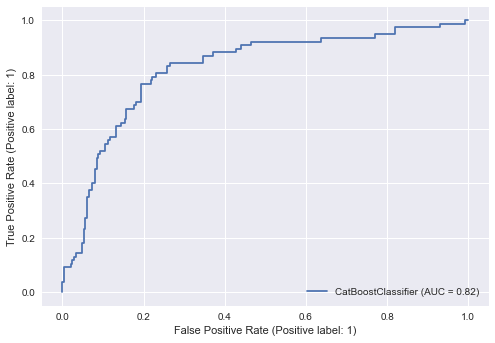

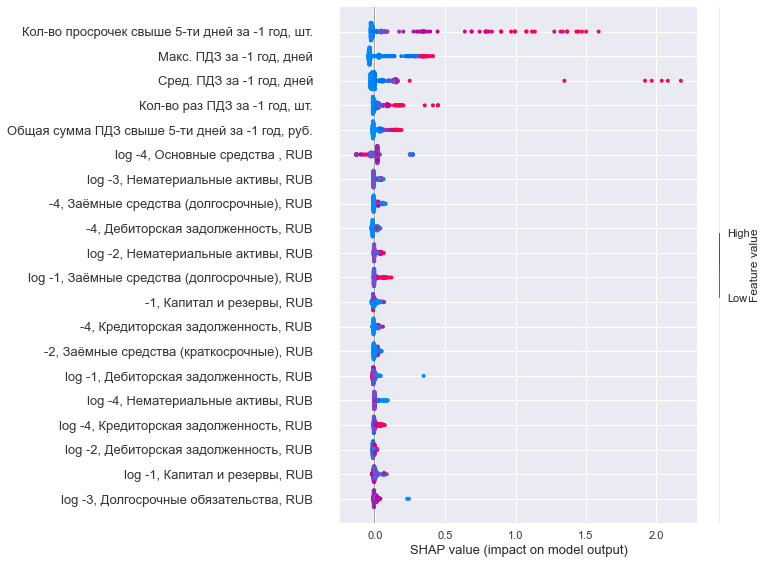


TRAIN: F1 = 0.43, Precision = 0.31, Recall = 0.699, Accuracy = 0.71, ROC_AUC = 0.794
TEST: F1 = 0.576, Precision = 0.434, Recall = 0.857, Accuracy = 0.702, ROC_AUC = 0.821



In [27]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=10,
                                file_path=OUTPUT_FILE, comment='count_log_fin_vals=True')

## normalize_fin_columns=True

In [28]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=True, drop_zeros=False)

In [29]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)

Target = target_more30days
Fitting model <catboost.core.CatBoostClassifier object at 0x000001A3BF51D9D0> with threshold = 0.01458...


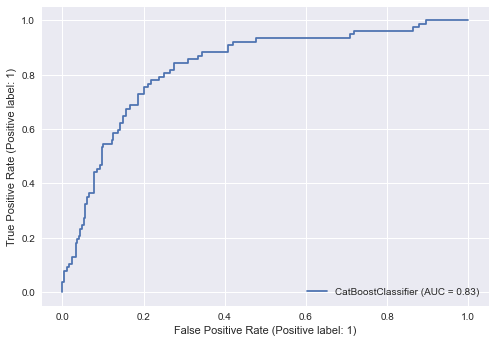

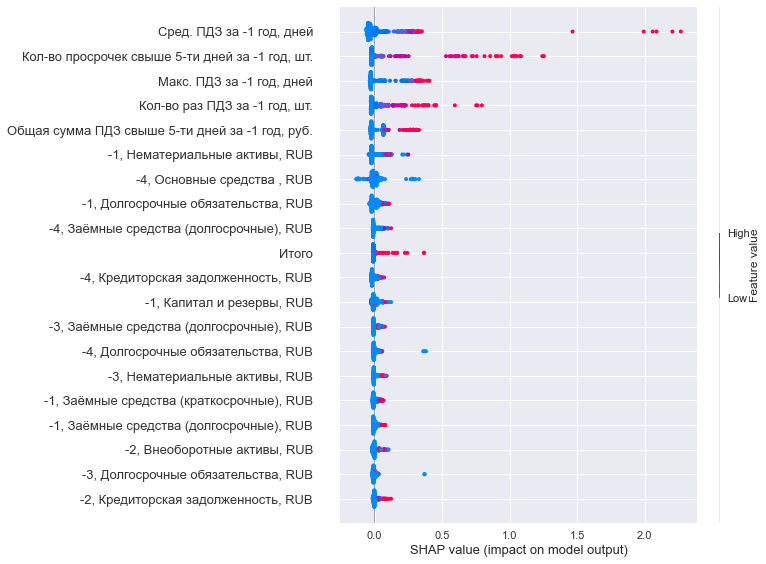


TRAIN: F1 = 0.396, Precision = 0.282, Recall = 0.663, Accuracy = 0.684, ROC_AUC = 0.775
TEST: F1 = 0.576, Precision = 0.428, Recall = 0.883, Accuracy = 0.692, ROC_AUC = 0.829



In [30]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=10,
                                file_path=OUTPUT_FILE, comment='normalize_fin_columns=True')